In [20]:
# note need to install transpile_benchy before running
# run 'pip install git+https://github.com/evmckinney9/transpile_benchy.git'
# also need to run 'pip install mqt.bench'

In [6]:
# circuits to test
from supermarq.benchmarks.ghz import GHZ
from supermarq.benchmarks.hamiltonian_simulation import HamiltonianSimulation
from supermarq.benchmarks.qaoa_vanilla_proxy import QAOAVanillaProxy
from supermarq.converters import cirq_to_qiskit


# # QAOA vanilla
def qaoa_vanilla_lambda(q):
    return cirq_to_qiskit(QAOAVanillaProxy(q).circuit())


from qiskit import QuantumCircuit

# weighted adder or ripple carry adder
from qiskit.circuit.library.arithmetic.adders.cdkm_ripple_carry_adder import (
    CDKMRippleCarryAdder,
)


# using trick of composing into an empty circuit so that it builds everything into a single quantumregister
def adder_lambda(q):
    return (
        QuantumCircuit(q)
        .compose(CDKMRippleCarryAdder(num_state_qubits=int((q - 1) / 2)), inplace=False)
        .decompose()
        .decompose()
        .decompose()
    )


# # GHZ
def ghz_lambda(q):
    return cirq_to_qiskit(GHZ(q).circuit())

In [3]:
# from transpile_benchy.interface import QASMBench
# from transpile_benchy.interface import QiskitFunctionInterface
# from transpile_benchy.src.transpile_benchy.interfaces.abc_interface import SubmoduleInterface
from transpile_benchy.src.transpile_benchy.metrics.abc_metrics import MetricInterface

# from transpile_benchy.src.transpile_benchy.metrics.gate_counts import DepthMetric
from transpile_benchy.src.transpile_benchy.interfaces.qasm_interface import QASMBench

# from transpile_benchy.src.transpile_benchy.interfaces.qasm_interface import QASMBench
# from qiskit.transpiler import CouplingMap
from typing import Iterator, List
from qiskit import QuantumCircuit

# circuits to test
from qiskit.circuit.library import QuantumVolume
from qiskit.circuit.library import PhaseEstimation
from qiskit.circuit.library.basis_change import QFT
from qiskit.circuit.library import LinearAmplitudeFunction
from qiskit.circuit.library import CDKMRippleCarryAdder


from supermarq.benchmarks.ghz import GHZ
from supermarq.benchmarks.hamiltonian_simulation import HamiltonianSimulation
from supermarq.benchmarks.qaoa_vanilla_proxy import QAOAVanillaProxy
from supermarq.converters import cirq_to_qiskit

# class CircuitsInterface(SubmoduleInterface):
#     def get_quantum_circuits(self) -> Iterator[QuantumCircuit]:
#         """Return an iterator over QuantumCircuits."""
#         for q in self.rangeQ:
#             if "QuantumVolume" in self.name:
#                 yield QuantumVolume(num_qubits=q, depth=q)
#             elif "QFT" in self.name:
#                 yield QFT(q, name = self.name)
#             elif "RippleAdder" in self.name:
#                 yield CDKMRippleCarryAdder(q, "full")
#             elif "LinearAmplitude" in self.name:
#                 yield LinearAmplitudeFunction(num_state_qubits=q)
#             elif "PhaseEstimation" in self.name:
#                 yield PhaseEstimation(num_evaluation_qubits=q, unitary=QuantumCircuit(2))
#             elif "QAOA_Vanilla" in self.name:
#                 yield cirq_to_qiskit(QAOAVanillaProxy(q).circuit())
#             elif "TIM_Hamiltonian" in self.name:
#                 yield cirq_to_qiskit(HamiltonianSimulation(q, 1 / q, 0.5).circuit())
#             elif "Adder" in self.name:
#                 yield (
#             QuantumCircuit(q)
#             .compose(CDKMRippleCarryAdder(num_state_qubits=int((q - 1) / 2)), inplace=False)
#             .decompose()
#             .decompose()
#             .decompose()
#             )
#             elif "GHZ" in self.name:
#                 yield cirq_to_qiskit(GHZ(q).circuit())
#     def estimate_circuit_count(self) -> int:
#         return len(self.rangeQ)

# class CircuitBench(CircuitsInterface):
#     def __init__(self, size, circuitName : str):
#         """
#         size: 'small', 'medium', or 'large'
#         small is [4, 6, 8, 10, 12, 14, 16]
#         """
#         self.size = size
#         self.name = circuitName
#         if isinstance(size, int):
#             self.rangeQ = [size]
#         elif'small' in size:
#             self.rangeQ = range(4, 17, 4) #specifies the range of qubits traversed
#         elif 'medium' in size:
#             self.rangeQ = range(16, 33, 4)
#         elif 'large' in size:
#             self.rangeQ = range(32, 65, 8) #specifies the range of qubits traversed
#         else:
#             self.rangeQ = range(4, 17, 2)

qasmBench = QASMBench(size="small", filter_list=["qft", "qaoa"])


class TotalMetric(MetricInterface):
    """Calculate the total 2Q gate count of a circuit."""

    def __init__(self):
        """Initialize the metric."""
        self.name = "Total Gates"

    @staticmethod
    def calculate(circuit: QuantumCircuit) -> float:
        """Calculate the depth of a circuit."""
        # dumb way :)
        from qiskit.converters import circuit_to_dag

        dag = circuit_to_dag(circuit)
        return len(dag.two_qubit_ops())
        # # return circuit.depth(filter_function=lambda x: x[0].name not in exclude_gates)
        # total_cx_count = circuit.count_ops()["cx"]
        # critcal_path_cx_count = circuit.depth(filter_function=lambda x : len(x.qargs) != 2)


# qasm_bench = QASMBench(size="large")

# qv_bench = QVBench(size = "large")

# size = 28

# qv_bench = CircuitBench(size=size, circuitName="QuantumVolume")
# qft_bench = CircuitBench(size=size, circuitName="QFT")
# ripple_adder_bench = CircuitBench(size=size, circuitName="RippleAdder")
# phase_est_bench = CircuitBench(size=size, circuitName="PhaseEstimation")
# linear_amp_bench = CircuitBench(size=size, circuitName="LinearAmplitude")
# qaoa_vanilla_bench  = CircuitBench(size=size, circuitName="QAOA_Vanilla")
# tim_ham_bench = CircuitBench(size=size, circuitName="TIM_Hamiltonian")
# adder_bench = CircuitBench(size=size, circuitName="Adder")
# GHZ_bench = CircuitBench(size=size, circuitName="GHZ")

# updated way to call qiskit functions
# num_qubits = [size]
# qv_bench = QiskitFunctionInterface(function_type = QuantumVolume, num_qubits=num_qubits)
# qft_bench = QiskitFunctionInterface(function_type = QFT, num_qubits=num_qubits)
# phase_est_bench = QiskitFunctionInterface(function_type=PhaseEstimation, num_qubits=num_qubits)

# qaoa_vanilla_bench  = QiskitFunctionInterface(function_type = cirq_to_qiskit(QAOAVanillaProxy.circuit()), num_qubits=num_qubits)
# tim_ham_bench = QiskitFunctionInterface(function_type = cirq_to_qiskit(HamiltonianSimulation.circuit()), num_qubits=num_qubits)
# adder_bench = QiskitFunctionInterface(function_type = cirq_to_qiskit(QuantumCircuit().compose(CDKMRippleCarryAdder()
#             .decompose()
#             .decompose()
#             .decompose())), num_qubits=num_qubits)
# GHZ_bench = QiskitFunctionInterface(function_type = cirq_to_qiskit(GHZ().circuit()), num_qubits=num_qubits)


# from transpile_benchy.metrics import DepthMetric

# depth_metric = DepthMetric()
total_metric = TotalMetric()

ModuleNotFoundError: No module named 'qiskit.algorithms.minimum_eigensolvers'

In [5]:
import sys

# sys.path.insert(0, '/home/jones1/Source/clonk_transpilation/.venv/lib/python3.9/site-packages')
sys.path
from monodromy.depthPath import MonodromyDepth

# export PYTHONPATH=$PYTHONPATH:</home/jones1/Source/clonk_transpilation/.venv/lib/python3.9/site-packages>

ModuleNotFoundError: No module named 'monodromy'

In [150]:
from transpile_benchy.runner import CustomPassManager
from qiskit.transpiler.passes import (
    DenseLayout,
    LookaheadSwap,
    TrivialLayout,
    BasicSwap,
    SabreLayout,
    SabreSwap,
)
from qiskit.transpiler.passes import (
    ApplyLayout,
    SetLayout,
    FullAncillaAllocation,
    EnlargeWithAncilla,
)


class Trivial_Basic(CustomPassManager):
    def main_process(self):
        """Process the circuit."""
        self.pm.append(
            [
                TrivialLayout(self.coupling),
                FullAncillaAllocation(self.coupling),
                EnlargeWithAncilla(),
                ApplyLayout(),
                BasicSwap(self.coupling),
            ]
        )


# class Dense_Lookahead(CustomPassManager):
#     def main_process(self, circuit):
#         """Process the circuit."""
#         self.main_pm.append(
#             [
#                 DenseLayout(coupling_map),
#                 FullAncillaAllocation(coupling_map),
#                 EnlargeWithAncilla(),
#                 ApplyLayout(),
#                 LookaheadSwap(coupling_map),
#             ]
#         )
#         return self.main_pm.run(circuit)


class SABRE(CustomPassManager):
    def main_process(self):
        """Process the circuit."""
        self.pm.append(
            [
                SabreLayout(self.coupling),
                # FullAncillaAllocation(coupling_map),
                # EnlargeWithAncilla(),
                # ApplyLayout(),
                SabreSwap(self.coupling),
            ]
        )

In [23]:
from qiskit import transpile
from abc import abstractmethod

# from transpile_benchy.src.transpile_benchy.runner import AbstractRunner
from transpile_benchy.src.transpile_benchy.passmanagers.abc_runner import (
    CustomPassManager,
)


class QiskitTranspileRunner(CustomPassManager):
    """used to noop the pre-, main-, post- passes"""

    def __init__(self, coupling_map, name: str = None):
        super().__init__(name=name)
        self.coupling_map = coupling_map

    def pre_process(self):
        pass

    def main_process(self, qc):
        return transpile(
            qc,
            coupling_map=self.coupling_map,
            optimization_level=3,
            basis_gates=["cx", "u"],
        )

    def post_process(self):
        pass


# class corral(QiskitTranspileRunner):
#     def __init__(self, coupling_map, name:str=None):
#         super().__init__(name=name)
#         self.coupling_map = coupling_map
#     def run(self, qc):
#         return transpile(qc, coupling_map=self.coupling_map, optimization_level=3, basis_gates=["cx", "u"])

In [24]:
def snail_to_connectivity(snail_edge_list):
    # Convert snail edge list where nodes are snails and edges are qubits
    # To connectivity edge list where nodes are qubits and edges are coupling
    edge_list = []

    # qubits are coupled to a snail edge if they are both adjacent to a snail node
    for qubit, snail_edge in enumerate(snail_edge_list):
        for temp_qubit, temp_snail_edge in enumerate(snail_edge_list):
            if qubit != temp_qubit and (
                snail_edge[0] in temp_snail_edge or snail_edge[1] in temp_snail_edge
            ):
                edge_list.append((qubit, temp_qubit))
    return edge_list


# define corral
def corral_skip(num_snails=32, num_levels=2, level_1_skip=1, level_2_skip=1):
    """Returns edge list of a corral of size specified snails are nodes,
    edges are qubits."""

    snail_edge_list = []
    for snail0, snail1 in zip(range(num_snails), range(1, num_snails + 1)):
        for i in range(1, num_levels + 1):
            if i == 1:
                snail_edge_list.append(((snail0 + level_1_skip) % num_snails, snail0))
            elif i == 2:
                snail_edge_list.append((snail0, (snail0 + level_2_skip) % num_snails))
    return snail_edge_list


from qiskit.transpiler.coupling import CouplingMap
import retworkx as rx
import random
import logging
import h5py

from src.clonk.backend_utils.mock_backends.Corral_backend_v1 import FakeCorral
import numpy as np


def pretty_print(edge_list, simple=True):
    if (
        simple
    ):  # simple only shows one connection if reverse node connection is there too
        temp = list(edge_list)
        temp2 = []
        for i, j in temp:
            if not (j, i) in temp2:
                temp2.append((i, j))
        edge_list = temp2

    x = CouplingMap(edge_list)

    # black magic errors when I modify the draw function directly in the CouplingMap file so Im just copying the code here to make it work
    import pydot
    from PIL import Image
    import io

    formatter2 = lambda edge: dict(dir="none", color="blue")

    pgraph = rx.PyGraph()

    graph_edges = x.get_edges()
    new_edges = []
    for e in graph_edges:
        e = list(e)
        e.append(1)
        new_edges.append(tuple(e))
    pgraph.add_nodes_from(list(range(64)))  # update so not specific to 64 qubit corrals
    pgraph.add_edges_from(new_edges)
    # update edge colors?
    graph_colors = rx.graph_greedy_color(pgraph)

    # for node in graph_colors:
    #     print(node)
    #     x.graph[node] = graph_colors[node] # z

    dot_str = x.graph.to_dot(
        edge_attr=formatter2, graph_attr={"size": "0", "color": "blue"}
    )

    dot = pydot.graph_from_dot_data(dot_str)[0]
    png = dot.create_png(prog="sfdp")
    pdf = dot.create_pdf(prog="sfdp")
    png = dot.create_png(prog="neato")
    return Image.open(io.BytesIO(png))

In [25]:
from qiskit.transpiler.coupling import CouplingMap
import math

input_corrals = {}
x_axis_values = []
size = 20
N = math.ceil(size / 2) + 1  # N is number of snails 2*N is number of qubits
first = 1
for i in range(
    1, N // 2 + 1, 1
):  # only need to do half of N connections since >N/2 makes repeat corrals
    name = f"corral_N_{N}_({first}_{i})"
    x_axis_values.append(i)
    input_corrals[i] = CouplingMap(
        snail_to_connectivity(
            corral_skip(num_snails=N, level_1_skip=first, level_2_skip=i)
        ),
        description=name,
    )


# display(pretty_print(snail_to_connectivity(corral_skip(num_snails = N, level_1_skip=first, level_2_skip=1))))
# display(pretty_print(snail_to_connectivity(corral_skip(num_snails = N, level_1_skip=first, level_2_skip=12))))
# display(pretty_print(snail_to_connectivity(corral_skip(num_snails = N, level_1_skip=first, level_2_skip=28))))
# display(pretty_print(snail_to_connectivity(corral_skip(num_snails = N, level_1_skip=first, level_2_skip=32))))
# display(pretty_print(snail_to_connectivity(corral_skip(num_snails = N, level_1_skip=first, level_2_skip=48))))

# ND = 16
# display(pretty_print(corral_skip(num_snails = ND, level_1_skip=first, level_2_skip=1) , simple =  False))
# display(pretty_print(corral_skip(num_snails = ND, level_1_skip=first, level_2_skip=2), simple =  False))
# display(pretty_print(corral_skip(num_snails = ND, level_1_skip=first, level_2_skip=3), simple =  False))
# display(pretty_print(corral_skip(num_snails = ND, level_1_skip=first, level_2_skip=4), simple =  False))
# display(pretty_print(corral_skip(num_snails = ND, level_1_skip=first, level_2_skip=6), simple =  False))
# display(pretty_print(corral_skip(num_snails = ND, level_1_skip=first, level_2_skip=7), simple =  False))
# display(pretty_print(corral_skip(num_snails = ND, level_1_skip=first, level_2_skip=8), simple =  False))

In [26]:
from logging import Logger
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


def plot(b=None, save=False):
    """Plot benchmark results.
    b is the bencmark instance, needed to overwrite plot func in class w/o changing source code
    """
    with plt.style.context("seaborn-darkgrid"):
        bar_width = 0.35
        transpiler_count = len(b.transpilers)

        # Define color palette, may need to add more colors in data exceeds current number of colors
        colors = [
            "#ff0000",
            "#ff8000",
            "#ffff00",
            "#80ff00",
            "#009900",
            "#00cccc",
            "#0000cc",
            "#b266ff",
            "#ff66b2",
            "#606060",
            "#1f77b4",
            "#ff7f0e",
            "#0000cc",
            "#ffcce5",
            "#B6196D",
            "#A800A8",
            "#5F69F7",
            "#5FBAF7",
            "#1EE7EE",
            "#1EEE78",
            "#ACF954",
            "#E8F954",
            "#D1A513",
            "#FF007f",
        ]

        # Loop over metrics
        for metric_name, results in b.results.items():
            labels = []
            plotlines = {}  # x y info for each corral

            fig, ax = plt.subplots()
            qubits = b.submodules[0].rangeQ
            # Create a line for each circuit
            for i, (circuit_name, circuit_results) in enumerate(results.items()):
                # Create a line for each qubit at different corral connection patterns
                for j, transpiler_result in enumerate(circuit_results):
                    if (
                        qubits[i] not in labels
                    ):  # transpiler result is str of corral name
                        labels.append(qubits[i])
                    # ax.scatter(qubits[i], circuit_results[transpiler_result], c = colors[j%len(colors)], label = transpiler_result,linewidth=2.0)
                    if qubits[i] in plotlines:
                        plotlines[qubits[i]][0].append(int(transpiler_result))
                        plotlines[qubits[i]][1].append(
                            circuit_results[transpiler_result]
                        )
                    else:
                        plotlines[qubits[i]] = [
                            [int(transpiler_result)],
                            [circuit_results[transpiler_result]],
                        ]
                        # each line for different qubit, x is corral, y is depth

            max_height = 0
            max_x = 0
            plt.figure(figsize=(15, 10))
            for i, c in enumerate(plotlines):
                plt.plot(plotlines[c][0], plotlines[c][1], marker="o", color=colors[i])
                if max(plotlines[c][1]) > max_height:
                    max_height = max(plotlines[c][1])
                if max(plotlines[c][0]) > max_x:
                    max_x = max(plotlines[c][0])

            # Add labels, title, etc
            plt.xlabel("Skip connections (1,x)")
            plt.ylabel(metric_name)
            # subtitle Best of N={self.num_runs} runs
            plt.title(
                f"Transpiler {metric_name} Comparison,\
                        Best of N={b.num_runs} runs"
            )

            max_fontsize = 10
            min_fontsize = 4
            font_size = max(min(max_fontsize, 800 // len(results)), min_fontsize)

            ax.set(
                xlim=(0, max_x + 2),
                xticks=np.arange(1, max_x + 2, 5),
                ylim=(0, max_height + 10),
                yticks=np.arange(1, max_height + 10, 500),
            )
            plt.legend(labels)  # number of qubits in circuit

            # Show the plot
            plt.show()
            # # Create figure for each metric
            # plt.figure(figsize=(10, 6))
            # #bar graph
            # # Create a bar for each circuit
            # for i, (circuit_name, circuit_results) in enumerate(results.items()):
            #     circuit_results = list(circuit_results.values())
            #     # Create a bar for each transpiler
            #     for j, transpiler_result in enumerate(circuit_results):
            #         plt.bar(
            #             i * transpiler_count + j * bar_width,
            #             transpiler_result,
            #             width=bar_width,
            #             color=colors[
            #                 j % len(colors)
            #             ],  # choose color based on transpiler index
            #             label=f"{b.transpilers[j].name}"
            #             if i == 0
            #             else "",  # avoid duplicate labels
            #         )

            # # Set x-ticks labels once for each metric
            # plt.xticks(
            #     np.arange(len(results)) * transpiler_count
            #     + bar_width * (transpiler_count - 1) / 2,
            #     results.keys(),
            #     rotation="vertical",
            #     fontsize=font_size,
            # )

            if save:
                plt.savefig(f"transpile_benchy_{metric_name}.svg", dpi=300)

In [27]:
from logging import Logger
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


def plotLines(b=None, save=False):
    with plt.style.context("seaborn-darkgrid"):
        bar_width = 0.35
        transpiler_count = len(b.transpilers)

        # Define color palette, may need to add more colors in data exceeds current number of colors
        colors = [
            "#ff0000",
            "#ff8000",
            "#ffff00",
            "#80ff00",
            "#009900",
            "#00cccc",
            "#0000cc",
            "#b266ff",
            "#ff66b2",
            "#606060",
            "#1f77b4",
            "#ff7f0e",
            "#0000cc",
            "#ffcce5",
            "#B6196D",
            "#A800A8",
            "#5F69F7",
            "#5FBAF7",
            "#1EE7EE",
            "#1EEE78",
            "#ACF954",
            "#E8F954",
            "#D1A513",
            "#FF007f",
        ]

        circuits = [
            "qv",
            "qft"
            # 'phase_estimation'
            # 'qaoa_vanilla'
            # 'tim',
            # 'adder',
            # 'GHZ'
        ]

        # Loop over metrics
        for metric_name in b.results.results.keys():
            results = b.results.results[metric_name]
            transpiler_count = len(b.transpilers)
            labels = []
            plotlines = {}  # x y info for each corral

            fig, ax = plt.subplots()
            qubits = b.submodules[0].rangeQ
            # Create a line for each circuit
            for i, (circuit_name, circuit_results) in enumerate(results.items()):
                # print(f'i: {i}, circ name: {circuit_name}')
                # Create a line for each qubit at different corral connection patterns
                for j, transpiler in enumerate(b.transpilers):
                    result_metrics = b.results.get_metrics(
                        metric_name, circuit_name, transpiler.name
                    )
                    # print(f'j: {j}, transpiler res: {transpiler_result}')
                    label = circuits[i]
                    if label not in labels:  # transpiler result is str of corral name
                        labels.append(label)
                    # ax.scatter(qubits[i], circuit_results[transpiler_result], c = colors[j%len(colors)], label = transpiler_result,linewidth=2.0)
                    if label in plotlines:
                        plotlines[label][0].append(x_axis_values[j])
                        plotlines[label][1].append(result_metrics.average)
                    else:
                        plotlines[label] = [
                            [x_axis_values[j]],
                            [result_metrics.average],
                        ]
                        # each line for different qubit, x is corral, y is depth

            max_height = 0
            max_x = 0
            plt.figure(figsize=(15, 10))
            for i, c in enumerate(plotlines):
                plt.plot(plotlines[c][0], plotlines[c][1], marker="o", color=colors[i])
                if max(plotlines[c][1]) > max_height:
                    max_height = max(plotlines[c][1])
                if max(plotlines[c][0]) > max_x:
                    max_x = max(plotlines[c][0])

            # Add labels, title, etc
            plt.xlabel("Skip connections (1,x)")
            plt.ylabel(metric_name)
            # subtitle Best of N={self.num_runs} runs
            plt.title(
                f"Transpiler {metric_name} Comparison,\
                        Best of N={b.num_runs} runs"
            )

            max_fontsize = 10
            min_fontsize = 4
            font_size = max(min(max_fontsize, 800 // len(results)), min_fontsize)

            ax.set(
                xlim=(0, max_x + 2),
                xticks=np.arange(1, max_x + 2, 5),
                ylim=(0, max_height + 10),
                yticks=np.arange(1, max_height + 10, 500),
            )
            plt.legend(labels)  # number of qubits in circuit

            # Show the plot
            plt.show()

In [156]:
# # Loop over metrics

# for metric_name in benchmark.results.results.keys():
#     results = benchmark.results.results[metric_name]
#     transpiler_count = len(benchmark.transpilers)
#     labels = []
#     plotlines = {} #x y info for each corral

#     fig, ax = plt.subplots()
#     qubits = benchmark.submodules[0].rangeQ
#     # Create a line for each circuit
#     for i, (circuit_name, circuit_results) in enumerate(results.items()):
#         # print(f'i: {i}, circ name: {circuit_name}')
#         # Create a line for each qubit at different corral connection patterns
#         for j, transpiler in enumerate(benchmark.transpilers):
#             result_metrics = benchmark.results.get_metrics(
#                 metric_name, circuit_name, transpiler.name )
#             data_dict = _loadData(circuits[i])
#             label = f'qubits{i}_{input_corrals[i].description}'
#             if label not in labels: #transpiler result is str of corral name
#                 labels.append(label)
#             if label in data_dict:
#                 data_dict[ label].append(result_metrics.average)
#             else:
#                 data_dict[label] = [[ result_metrics.average ]]

In [157]:
def _loadData(label):
    """load data as dict wit key as freq"""
    logging.info("loading data")
    with h5py.File("data.hdf5", "r+") as f:
        group = f.require_group("corral_skip_patterns")
        data_list = group.require_dataset(label, shape=(1, 2), dtype="float32")
        return data_list[()]


# label is circuit name, returns dict w/ key corral_pattern_qubits, value is [depth, gatecount]
def _saveData(self, label, data_list):
    """save data using h5py"""
    logging.info("saving data")
    # save for cavity drive freq
    with h5py.File("data.hdf5", "w") as f:
        group = f.require_group("corral_skip_patterns")
        group.create_dataset(name=label, data=data_list)

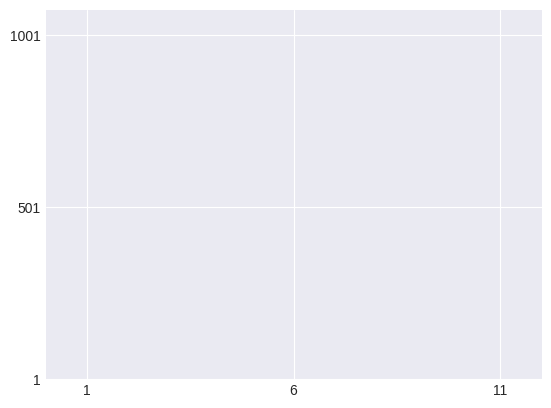

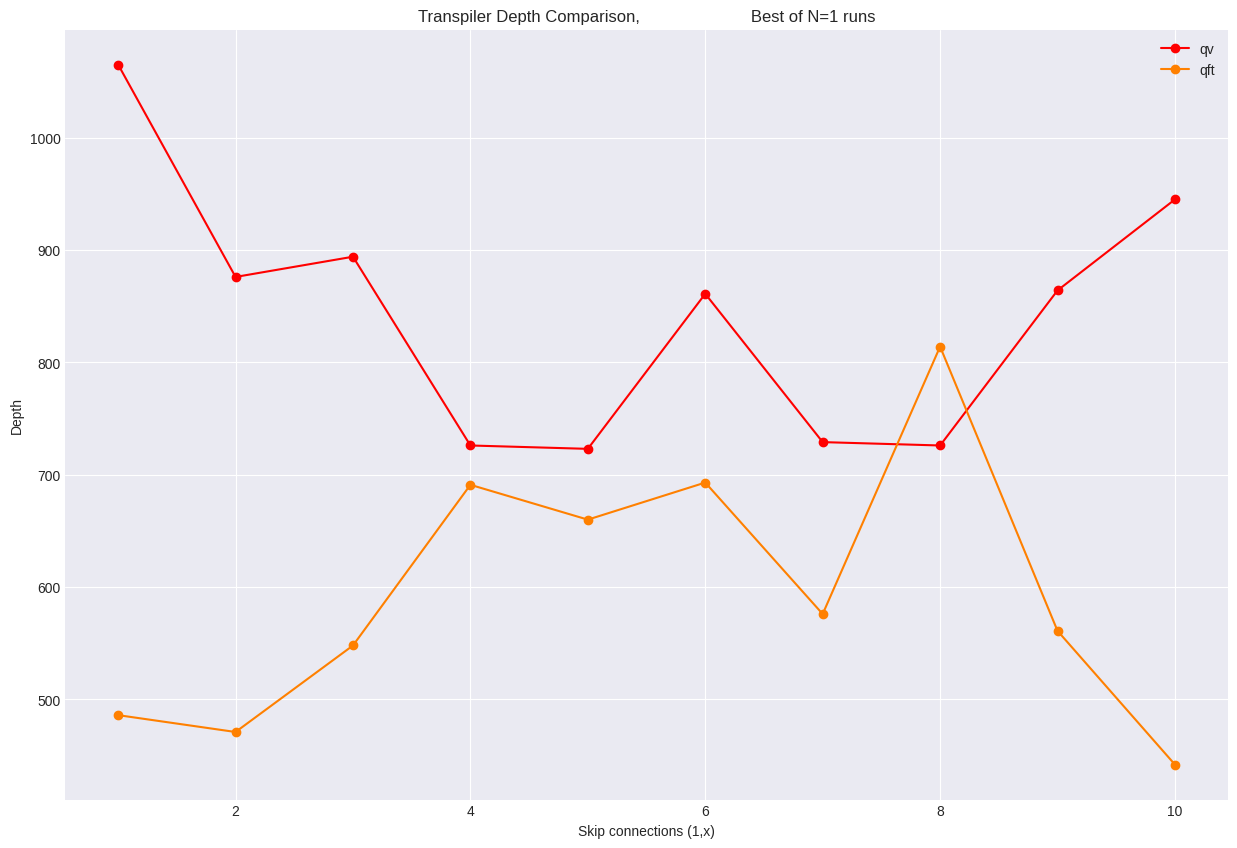

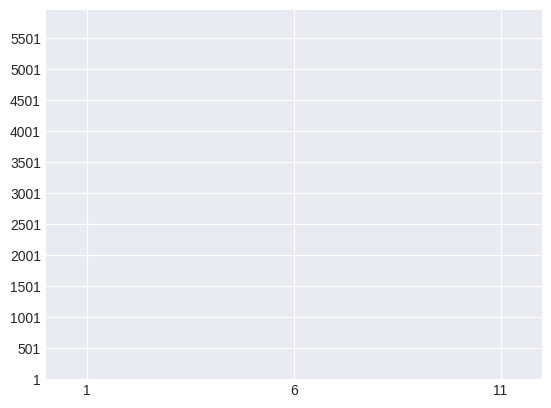

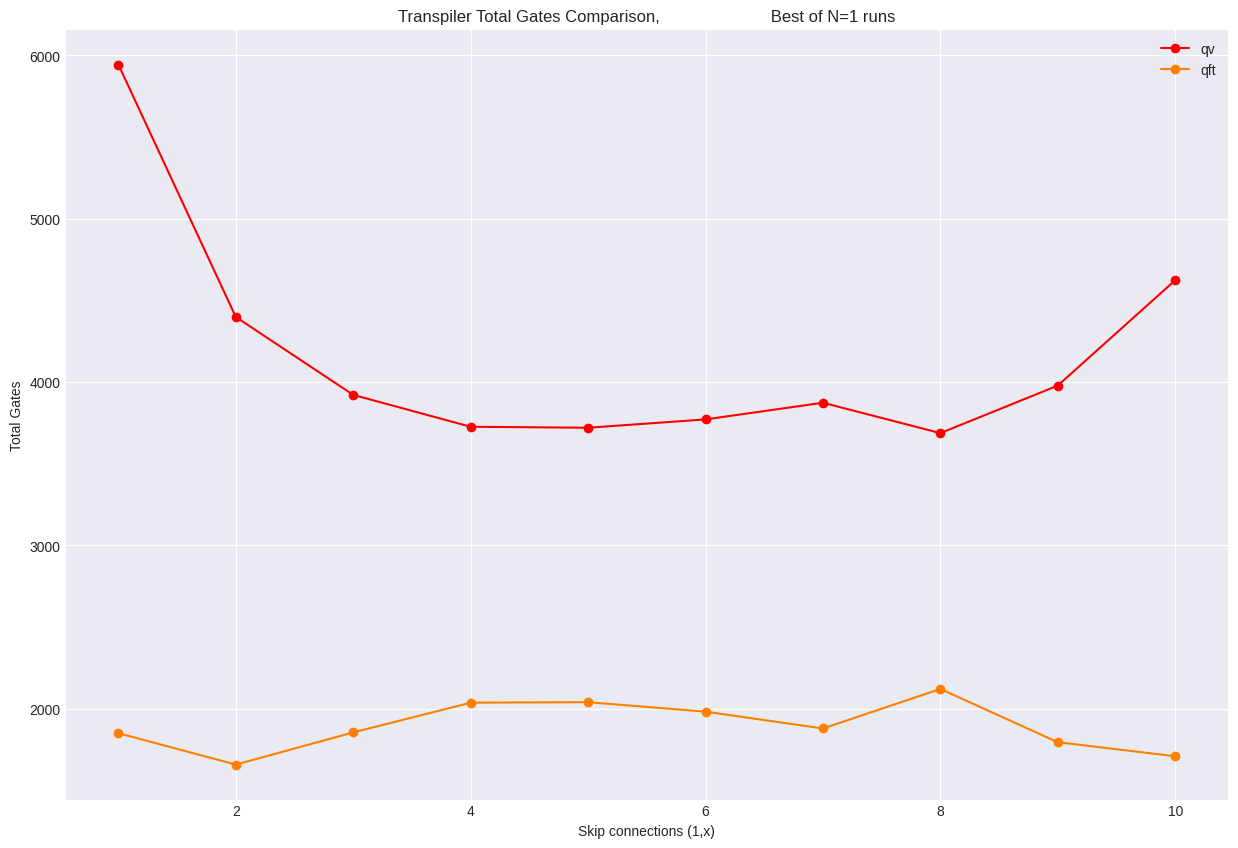

In [134]:
plotLines(benchmark, save=True)

In [159]:
from transpile_benchy.src.transpile_benchy.benchmark import Benchmark

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)
transpilersCorral = []
for c in input_corrals:
    transpilersCorral.append(
        transpilersCorral(input_corrals[c], name=str(c))
    )  # name is number of skipped qubits in connections connection would be (1,c)

benchmark = Benchmark(
    transpilers=transpilersCorral,
    submodules=[
        qasmBench
        # ripple_adder_bench
        # phase_est_bench
        # qaoa_vanilla_bench
        # tim_ham_bench,
        # adder_bench,
        # GHZ_bench
    ],
    metrics=[depth_metric, total_metric],
    logger=transpile_benchy_logger,
    num_runs=3,
)
benchmark.run()
benchmark.plot(save=True)
# plot(b = benchmark, save=True)

Running circuits for CircuitBench:   0%|          | 0/1 [00:27<?, ?it/s]


LinAlgError: eig algorithm (geev) did not converge (only eigenvalues with order >= 2 have converged)

In [68]:
from transpile_benchy.benchmark import Benchmark

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)
transpilersCorral = []
for c in input_corrals:
    transpilersCorral.append(
        corral(input_corrals[c], name=str(c))
    )  # name is number of skipped qubits in connections connection would be (1,c)

benchmark2 = Benchmark(
    transpilers=transpilersCorral,
    submodules=[
        qv_bench,
        qft_bench,
        qaoa_vanilla_bench,
        tim_ham_bench,
        adder_bench,
        GHZ_bench,
    ],
    metrics=[depth_metric, total_metric],
    logger=transpile_benchy_logger,
)
benchmark2.run()
benchmark2.plot(save=True)

Running circuits for CircuitBench:   0%|          | 0/1 [24:11:10<?, ?it/s]
capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 